In [2]:
print("Hello")

Hello


In [1]:
!nvidia-smi

Sat Sep 24 03:05:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 22.2 MB/s 
     |████████████████████████████████| 108 kB 56.5 MB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 
     |████████████████████████████████| 604 kB 57.5 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [7]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from IPython.display import Image

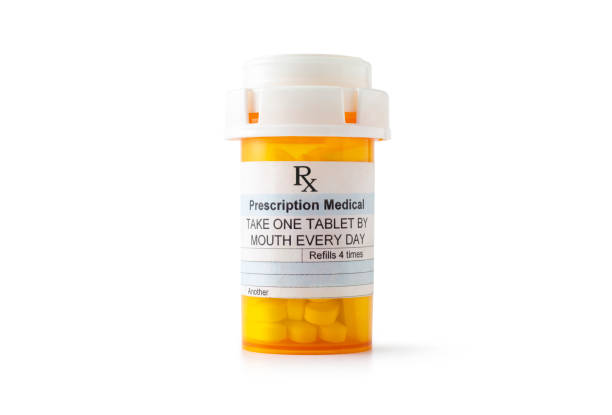

In [8]:
Image("/content/bottle.jpg")

In [9]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [10]:
output = reader.readtext("/content/bottle.jpg")

In [11]:
output

[([[290, 164], [322, 164], [322, 196], [290, 196]], 'R', 0.9996213079458052),
 ([[247, 199], [367, 199], [367, 215], [247, 215]],
  'Prescription Medical',
  0.9147150232585308),
 ([[245, 213], [371, 213], [371, 233], [245, 233]],
  'TAKE ONE TABLET EY',
  0.6415314261141303),
 ([[247, 231], [367, 231], [367, 249], [247, 249]],
  'MOUTH EVERY DAY',
  0.9061627181542872),
 ([[307, 249], [339, 249], [339, 263], [307, 263]],
  'Refills',
  0.9949265808502515)]

In [19]:
output[1][1]

'Prescription Medical'

In [41]:
cord = output[3][0]

In [42]:
cord

[[247, 231], [367, 231], [367, 249], [247, 249]]

In [43]:
a = list(zip(* cord))
a

[(247, 367, 367, 247), (231, 231, 249, 249)]

In [44]:
min(a[0])

247

In [45]:
min(a[1])

231

In [46]:
max(a[0])

367

In [47]:
max(a[1])

249

In [48]:
x_min, y_min = [int(min(idx)) for idx in zip(* cord)]
x_min, y_min

(247, 231)

In [49]:
x_max, y_max = [int(max(idx)) for idx in zip(* cord)]
x_max, y_max

(367, 249)

OpenCV - BGR
Matplotlib - RGB

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 30

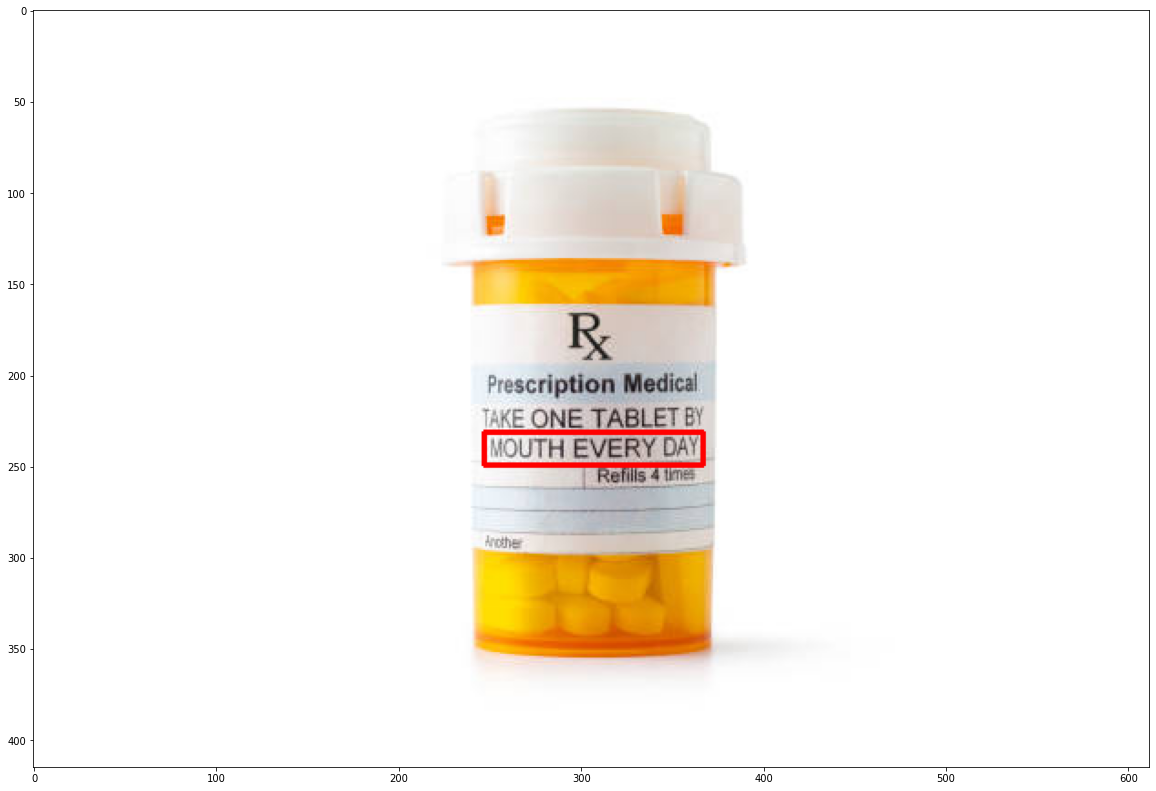

In [51]:
image = cv2.imread("/content/bottle.jpg")
cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0,0,255), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))    

